In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wine-rating-and-price/Varieties.csv
/kaggle/input/wine-rating-and-price/Sparkling.csv
/kaggle/input/wine-rating-and-price/Rose.csv
/kaggle/input/wine-rating-and-price/White.csv
/kaggle/input/wine-rating-and-price/Red.csv


# Part 1 Data Import and Description

In [2]:
# Imported the red wine csv for analysis and named wine_df
wine_df = pd.read_csv('/kaggle/input/wine-rating-and-price/Red.csv')
wine_df

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016
...,...,...,...,...,...,...,...,...
8661,6th Sense Syrah 2016,United States,Lodi,Michael David Winery,3.8,994,16.47,2016
8662,Botrosecco Maremma Toscana 2016,Italy,Maremma Toscana,Le Mortelle,4.0,995,20.09,2016
8663,Haut-Médoc 2010,France,Haut-Médoc,Château Cambon La Pelouse,3.7,996,23.95,2010
8664,Shiraz 2019,Australia,South Eastern Australia,Yellow Tail,3.5,998,6.21,2019


In [3]:
wine_df.describe()

,Rating,NumberOfRatings,Price
count,8666.000000,8666.000000,8666.000000
mean,3.890342,415.287445,39.145065
std,0.308548,899.726373,84.936307
min,2.500000,25.000000,3.550000
25%,3.700000,66.000000,10.680000
50%,3.900000,157.000000,18.200000
75%,4.100000,401.000000,38.142500
max,4.800000,20293.000000,3410.790000


array([[<AxesSubplot:title={'center':'Rating'}>,
        <AxesSubplot:title={'center':'NumberOfRatings'}>],
       [<AxesSubplot:title={'center':'Price'}>, <AxesSubplot:>]],
      dtype=object)

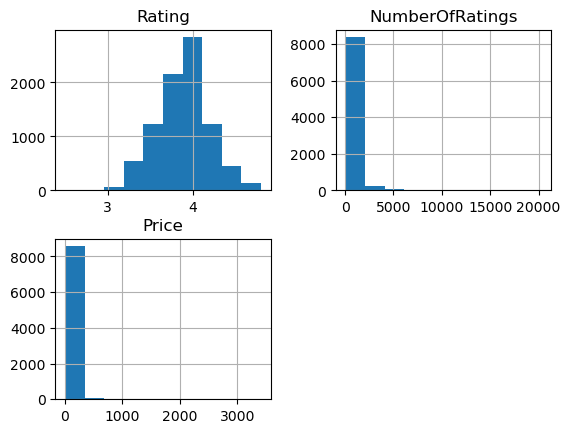

In [4]:
wine_df.hist()

In [5]:
wine_df.columns

Index(['Name', 'Country', 'Region', 'Winery', 'Rating', 'NumberOfRatings',
       'Price', 'Year'],
      dtype='object')

In [6]:
wine_df.shape

(8666, 8)

In [7]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8666 entries, 0 to 8665
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             8666 non-null   object 
 1   Country          8666 non-null   object 
 2   Region           8666 non-null   object 
 3   Winery           8666 non-null   object 
 4   Rating           8666 non-null   float64
 5   NumberOfRatings  8666 non-null   int64  
 6   Price            8666 non-null   float64
 7   Year             8666 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 541.8+ KB


# Part 2 Data Cleansing and Transformation

In [8]:
# check for any missing value in the dataset
missing_values = wine_df.isnull()
print(missing_values)

       Name  Country  Region  Winery  Rating  NumberOfRatings  Price   Year
0     False    False   False   False   False            False  False  False
1     False    False   False   False   False            False  False  False
2     False    False   False   False   False            False  False  False
3     False    False   False   False   False            False  False  False
4     False    False   False   False   False            False  False  False
...     ...      ...     ...     ...     ...              ...    ...    ...
8661  False    False   False   False   False            False  False  False
8662  False    False   False   False   False            False  False  False
8663  False    False   False   False   False            False  False  False
8664  False    False   False   False   False            False  False  False
8665  False    False   False   False   False            False  False  False

[8666 rows x 8 columns]


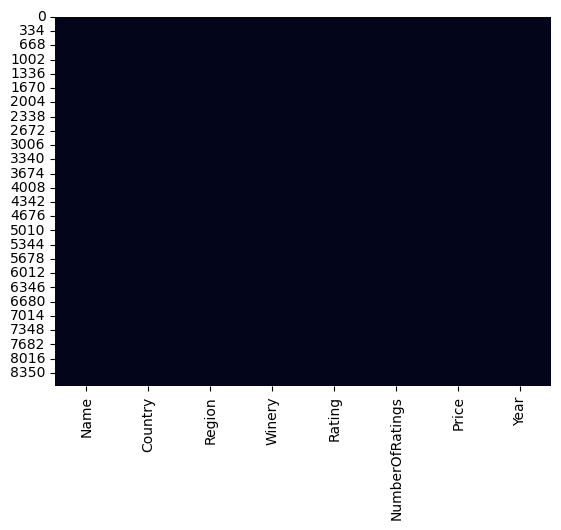

In [9]:
# any missing value will be represented as light color in the heatmap
import seaborn as sns
sns.heatmap(wine_df.isnull(), cbar=False)
# import matplot library here first (will use it later)
import matplotlib.pyplot as plt

In [10]:
# count the missing value of each volumn and sum it up 
missing_count = wine_df.isnull().sum()
print(missing_count)

Name               0
Country            0
Region             0
Winery             0
Rating             0
NumberOfRatings    0
Price              0
Year               0
dtype: int64


In [11]:
# transform the text into integers for 'NumberOfRatings' and 'Year' & 'Price' into float
wine_df['NumberOfRatings'] = wine_df['NumberOfRatings'].astype(int)
wine_df['Rating'] = wine_df['Rating'].astype(float)
wine_df['Price'] = wine_df['Price'].astype(float)

In [12]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8666 entries, 0 to 8665
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             8666 non-null   object 
 1   Country          8666 non-null   object 
 2   Region           8666 non-null   object 
 3   Winery           8666 non-null   object 
 4   Rating           8666 non-null   float64
 5   NumberOfRatings  8666 non-null   int64  
 6   Price            8666 non-null   float64
 7   Year             8666 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 541.8+ KB


In [13]:
# I could not change the 'Year' column to integer, so I examined if there is any non-integer value in 'Year'
numeric_col = pd.to_numeric(wine_df['Year'], errors='coerce')
non_numeric_count = numeric_col.isna().sum()
print("Number of non-integer values:", non_numeric_count)

Number of non-integer values: 8


In [14]:
# I want to filter the rows that contain non-integer value in the 'Year'
numeric_col = pd.to_numeric(wine_df['Year'], errors='coerce')
non_numeric_rows = wine_df.loc[numeric_col.isna()]
print(non_numeric_rows['Year'])

197     N.V.
282     N.V.
943     N.V.
2201    N.V.
2404    N.V.
4527    N.V.
4833    N.V.
5632    N.V.
Name: Year, dtype: object


In [15]:
# I removed these rows before moving forwards for further analysis
wine_df = wine_df.loc[wine_df['Year'] != 'N.V.']
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8658 entries, 0 to 8665
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             8658 non-null   object 
 1   Country          8658 non-null   object 
 2   Region           8658 non-null   object 
 3   Winery           8658 non-null   object 
 4   Rating           8658 non-null   float64
 5   NumberOfRatings  8658 non-null   int64  
 6   Price            8658 non-null   float64
 7   Year             8658 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 608.8+ KB


In [16]:
# I removed those rows containing null data in the 'Year' column.
wine_df = wine_df.dropna(subset=['Year'])
wine_df = wine_df.reset_index(drop=True)
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8658 entries, 0 to 8657
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             8658 non-null   object 
 1   Country          8658 non-null   object 
 2   Region           8658 non-null   object 
 3   Winery           8658 non-null   object 
 4   Rating           8658 non-null   float64
 5   NumberOfRatings  8658 non-null   int64  
 6   Price            8658 non-null   float64
 7   Year             8658 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 541.2+ KB


In [17]:
# I removed the missing values. Now the data is good for further analysis.
wine_df['Year'] = wine_df['Year'].astype(int)
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8658 entries, 0 to 8657
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             8658 non-null   object 
 1   Country          8658 non-null   object 
 2   Region           8658 non-null   object 
 3   Winery           8658 non-null   object 
 4   Rating           8658 non-null   float64
 5   NumberOfRatings  8658 non-null   int64  
 6   Price            8658 non-null   float64
 7   Year             8658 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 541.2+ KB


# Part 3 Descriptive Statistics

In [18]:
# Counting the unique non-duplicate values in columns containing text data
unique_values_count = wine_df['Name'].nunique()
print("Unique data in the 'Name' column:", unique_values_count)
unique_values_count2 = wine_df['Country'].nunique()
print("Unique data in the 'Country' column:", unique_values_count2)
unique_values_count3 = wine_df['Region'].nunique()
print("Unique data in the 'Region' column:", unique_values_count3)
unique_values_count4 = wine_df['Winery'].nunique()
print("Unique data in the 'Winery' column:", unique_values_count4)
# Name and the winery seems to be unique per each wine
# We might be interested to examine the relationship between the country where the wine was produced and their price and quality

Unique data in the 'Name' column: 6713
Unique data in the 'Country' column: 30
Unique data in the 'Region' column: 623
Unique data in the 'Winery' column: 2713


In [19]:
# sorted the data based on rating and price for your reference of the data scope
wine_df.sort_values(by=['Rating','Price'], ascending=False)

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
948,Barolo Riserva Monfortino 2013,Italy,Barolo,Giacomo Conterno,4.8,132,1115.50,2013
8065,Toscana 2016,Italy,Toscana,Masseto,4.8,85,960.17,2016
4026,L'Ermita Velles Vinyes Priorat 2008,Spain,Priorat,Álvaro Palacios,4.8,32,672.60,2008
3415,G 2015,South Africa,Western Cape,4G Wine Estate,4.8,28,463.03,2015
3742,Beckstoffer Las Piedras Vineyard Cabernet Sauv...,United States,St. Helena,Paul Hobbs,4.8,30,368.47,2015
...,...,...,...,...,...,...,...,...
7083,Villa Mura Bardolino 2015,Italy,Bardolino,Sartori,2.8,66,7.32,2015
4536,Dolcetto d'Alba 2013,Italy,Dolcetto d'Alba,Piazzo,2.7,36,9.12,2013
4171,Marche Rosso 2015,Italy,Marche,Roberto Lucarelli,2.6,33,11.50,2015
4991,Cabernet Sauvignon 2016,France,Pays d'Oc,Fortant,2.5,40,8.29,2016


In [20]:
# printed the descriptive statistics for the column 'Rating'
print('\033[1mThe descriptive statistics for rating:\033[0m')
display(wine_df['Rating'].mean())
display(wine_df['Rating'].std())
display(wine_df['Rating'].median())
display(wine_df['Rating'].max())
display(wine_df['Rating'].min())
display(wine_df['Rating'].quantile([0.25, 0.50, 0.75]))

The descriptive statistics for rating:


3.8901478401478404

0.30842949363344585

3.9

4.8

2.5

0.25    3.7
0.50    3.9
0.75    4.1
Name: Rating, dtype: float64

In [21]:
# printed the mode for the column 'Rating'. The mode is 3.8
wine_df['Rating'].mode()

0    3.8
dtype: float64

In [22]:
# printed the range of the 'Rating' column based on the difference between the max and the min value
wine_df['Rating'].max() - wine_df['Rating'].min()

2.3

In [23]:
# printed the descriptive statistics for the column 'Price'
print('\033[1mThe descriptive statistics for price:\033[0m')
display(wine_df['Price'].mean())
display(wine_df['Price'].std())
display(wine_df['Price'].median())
display(wine_df['Price'].max())
display(wine_df['Price'].min())
display(wine_df['Price'].quantile([0.25, 0.50, 0.75]))
display(wine_df['Price'].mode())
wine_df['Price'].max() - wine_df['Price'].min()

The descriptive statistics for price:


39.149788634788635

84.96350306447792

18.2

3410.79

3.55

0.25    10.6825
0.50    18.2000
0.75    38.2275
Name: Price, dtype: float64

0    9.9
dtype: float64

3407.24

In [24]:
# create z-score for the price of each item through introducing a new library and function
from scipy import stats
print('\033[1mThe z-score of price for each item:\033[0m')
stats.zscore(wine_df['Price'])

The z-score of price for each item:


0       0.657382
1      -0.278368
2      -0.373120
3      -0.358172
4      -0.117702
          ...   
8653   -0.266951
8654   -0.224342
8655   -0.178908
8656   -0.387716
8657   -0.368059
Name: Price, Length: 8658, dtype: float64

In [25]:
# create z-score for the rating of each item
print('\033[1mThe z-score of rating for each item:\033[0m')
stats.zscore(wine_df['Rating'])

The z-score of rating for each item:


0       1.004671
1       1.328913
2       0.031945
3      -1.265023
4       0.031945
          ...   
8653   -0.292297
8654    0.356187
8655   -0.616539
8656   -1.265023
8657   -1.589265
Name: Rating, Length: 8658, dtype: float64

# Part 4 Distribution Analysis

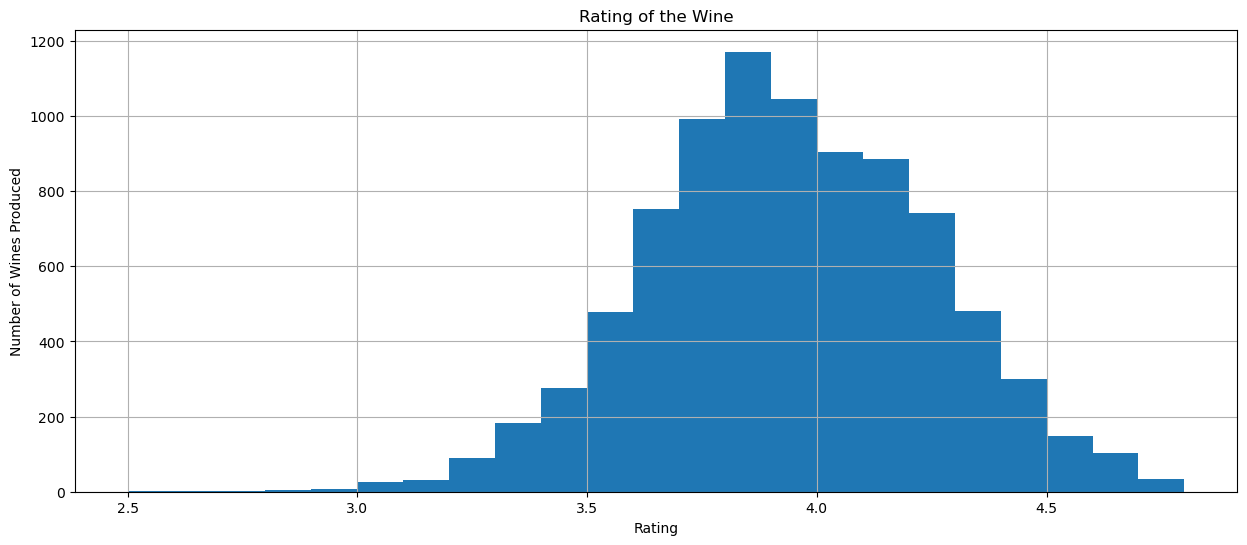

In [26]:
# creating a histogram to show the number of wines produced by the rating 0.1 (range 2.3 separating by 23 bins)
wine_df.hist(column=['Rating'], bins=23, cumulative=False, figsize=(15,6), histtype='stepfilled')
plt.title('Rating of the Wine')
plt.xlabel('Rating')
plt.ylabel('Number of Wines Produced')
plt.show()
# there were most wines produced with 3.8 rating out of 5.

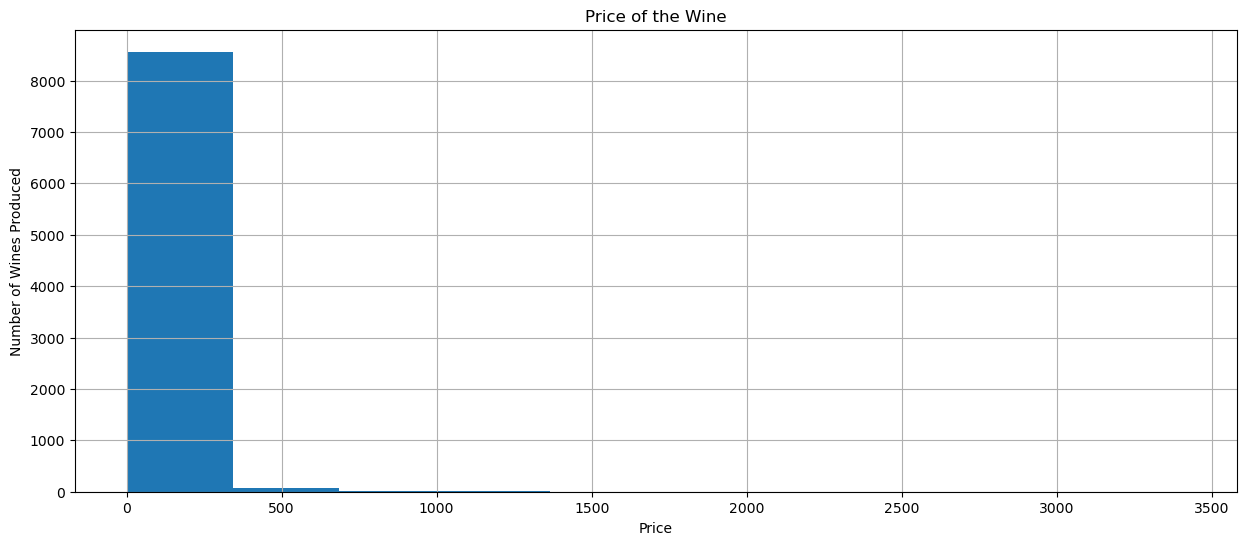

In [27]:
# creating a histogram to show the number of wines produced by the rating 0.1 (range 2.3 separating by 23 bins)
wine_df.hist(column=['Price'], bins=10, cumulative=False, figsize=(15,6), histtype='stepfilled')
plt.title('Price of the Wine')
plt.xlabel('Price')
plt.ylabel('Number of Wines Produced')
plt.show()
# most wines are priced under $500. Using histogram isn't clear, so I will create a pivot table.

In [28]:
# Creating a list to store the 0th & 25th & median & 75th & 100th percent quartile data
my_bin = wine_df['Price'].quantile([0, 0.25, 0.5, 0.75, 1]).tolist()
rounded_bin = [round(x, 0) for x in my_bin]
print(rounded_bin)
# Rounded the output to the nearest whole number

[4.0, 11.0, 18.0, 38.0, 3411.0]


In [29]:
# Created a new column price_range to store the rounded_bin data in four ranges
wine_df['Price_range'] = \
    pd.cut(wine_df['Price'], bins=rounded_bin, labels=['$4-11', '$11-18', '$18-38', '$38-3411'])
wine_df[['Price_range', 'Price']]
# Will reuse this in the next session when creating a pivot table

,Price_range,Price
0,$38-3411,95.00
1,$11-18,15.50
2,$4-11,7.45
3,$4-11,8.72
4,$18-38,29.15
...,...,...
8653,$11-18,16.47
8654,$18-38,20.09
8655,$18-38,23.95
8656,$4-11,6.21


In [30]:
# calculating the correlation between the price and rating
wine_df.loc[:,['Price','Rating']].cov

<bound method DataFrame.cov of       Price  Rating
0     95.00     4.2
1     15.50     4.3
2      7.45     3.9
3      8.72     3.5
4     29.15     3.9
...     ...     ...
8653  16.47     3.8
8654  20.09     4.0
8655  23.95     3.7
8656   6.21     3.5
8657   7.88     3.4

[8658 rows x 2 columns]>

In [31]:
# creating a correlation matrix
wine_df.loc[:,['Price', 'Rating']].corr()

,Price,Rating
Price,1.000000,0.451251
Rating,0.451251,1.000000


In [32]:
# calculating correlation efficients with p-values
from scipy.stats import pearsonr

pearsonr(wine_df['Price'], wine_df['Rating'])

(0.45125138569757595, 0.0)

# Part 5 Data Visualization

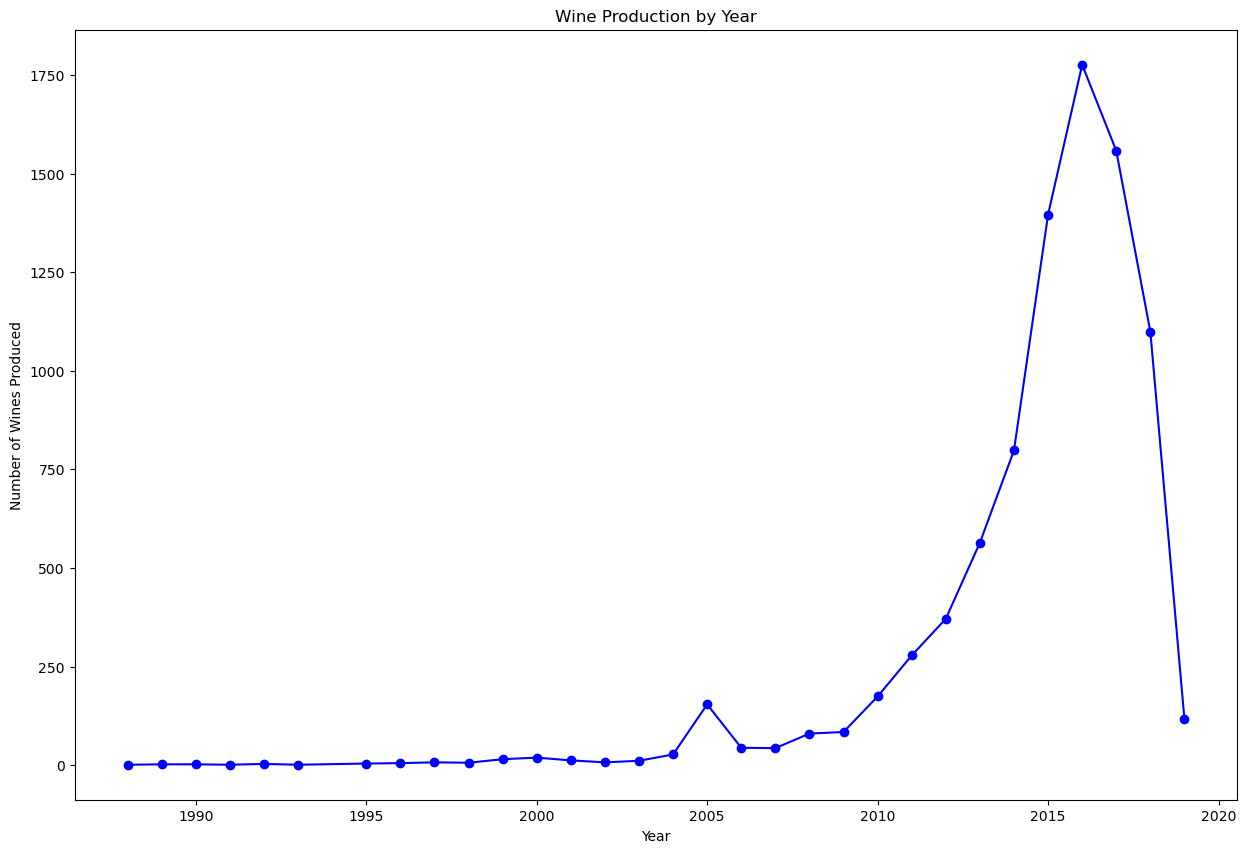

In [33]:
# Creating a line chart to show the number of wines produced each year.
grouped = wine_df.groupby('Year')['Name'].count()
grouped.plot(kind='line', figsize=(15,10), color='blue', marker='o')
plt.title('Wine Production by Year')
plt.xlabel('Year')
plt.ylabel('Number of Wines Produced')
plt.show()

# There were most wine produced in 2016

Text(0, 0.5, 'Number of Wines Produced')

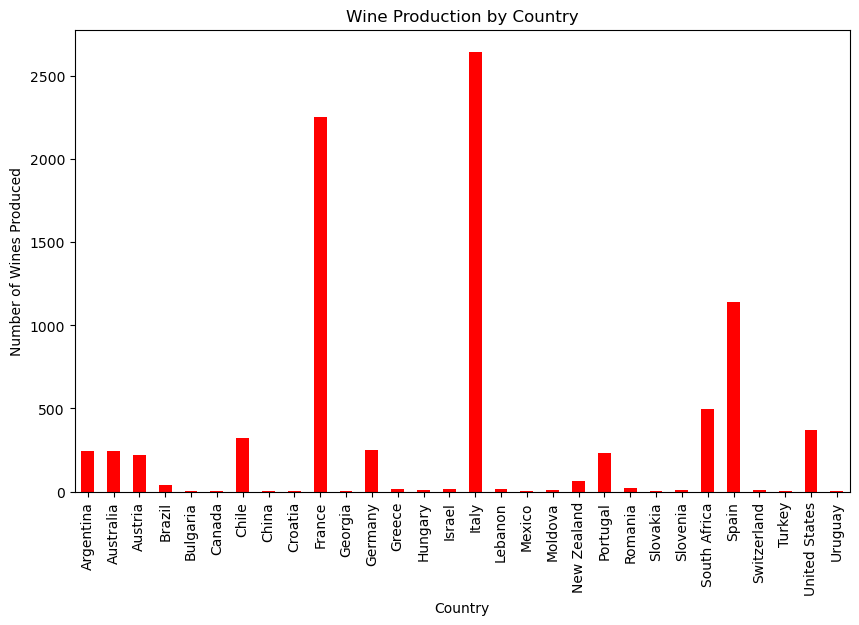

In [34]:
# Creating a bar chart to show the number of wines produced in each country.
grouped = wine_df.groupby('Country')['Name'].count()
grouped.plot(kind='bar', figsize=(10,6), color='red')
plt.title('Wine Production by Country')
plt.xlabel('Country')
plt.ylabel('Number of Wines Produced')
# There were most wine produced in Italy

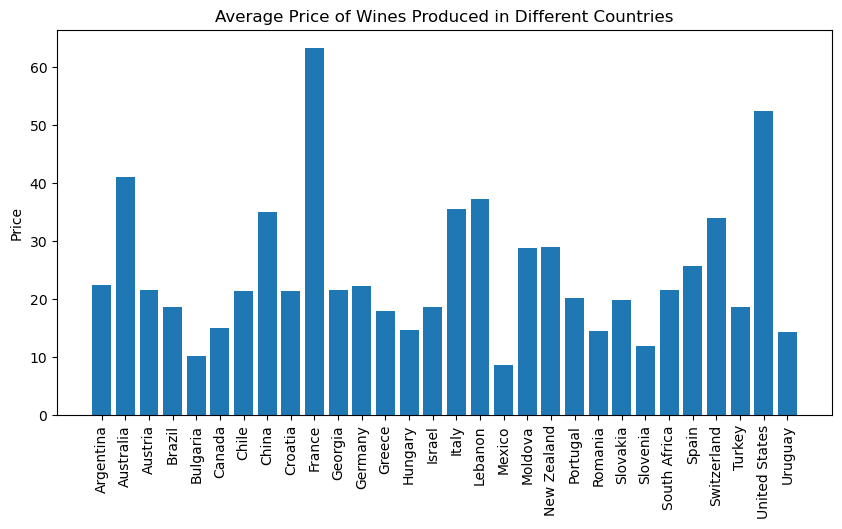

In [35]:
# visualize the average price of wine produced in each country.
country_groups = wine_df.groupby("Country")
avg_prices = country_groups["Price"].mean()
plt.figure(figsize=(10,5))
plt.bar(avg_prices.index, avg_prices.values)
plt.xticks(rotation=90)
plt.title("Average Price of Wines Produced in Different Countries")
plt.ylabel("Price")
plt.show()

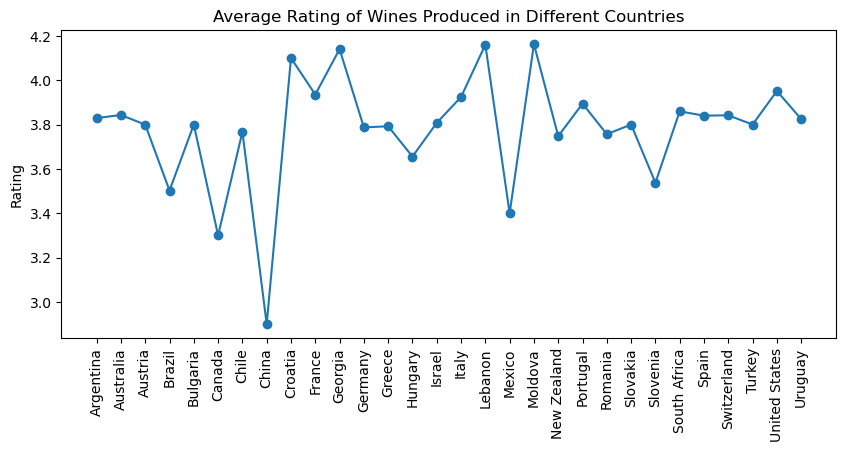

In [36]:
# calculate the average rating of wine produced in each country.
country_groups = wine_df.groupby("Country")
avg_ratings = country_groups["Rating"].mean()
plt.figure(figsize=(10,4))
plt.plot(avg_ratings.index, avg_ratings.values, marker="o")
plt.xticks(rotation=90)
plt.title("Average Rating of Wines Produced in Different Countries")
plt.ylabel("Rating")
plt.show()

<AxesSubplot:xlabel='Rating', ylabel='Price'>

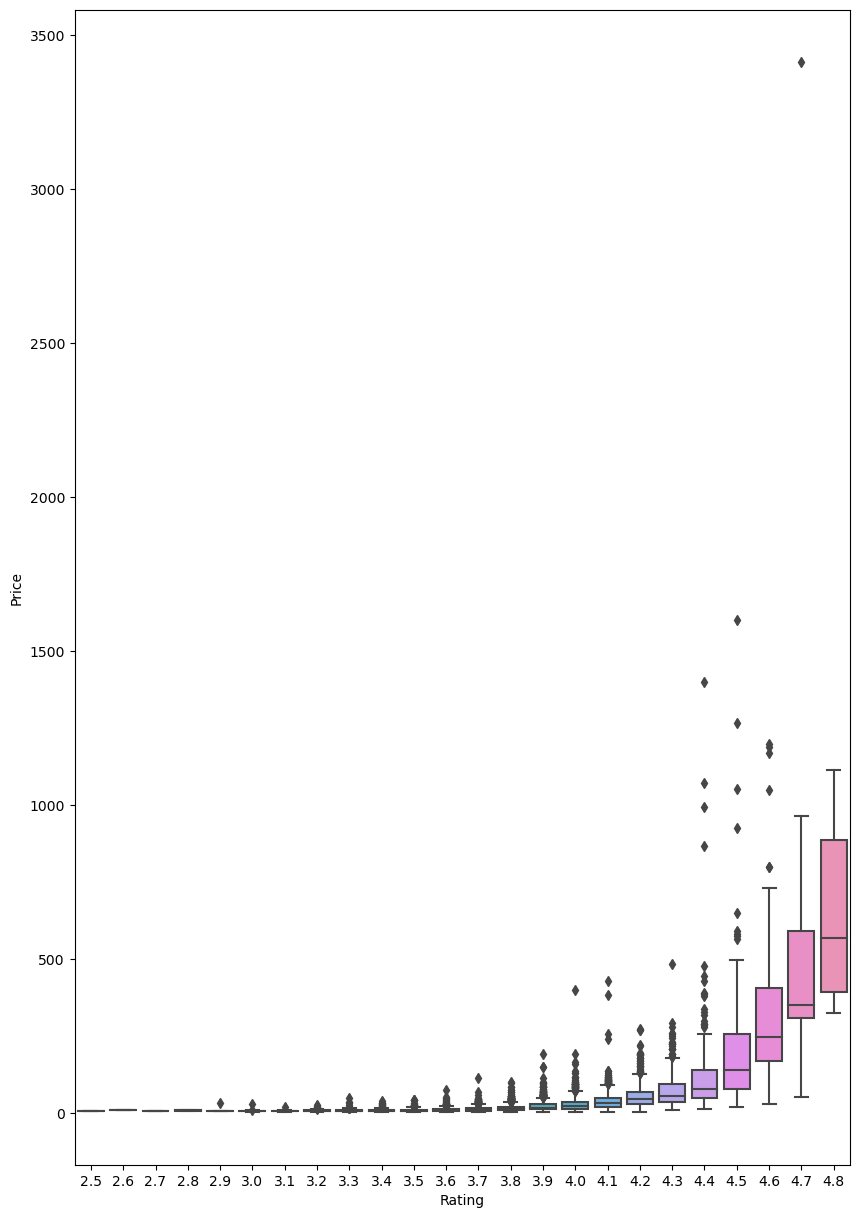

In [37]:
# create a box plot to identify outliers between price and rating
plt.figure(figsize=(10,15))
sns.boxplot(data=wine_df, y='Price', x='Rating', orient='v')
# we can identify the standalone dots are those data beyong 1.5 IQR from the mean

<AxesSubplot:xlabel='Rating', ylabel='Price'>

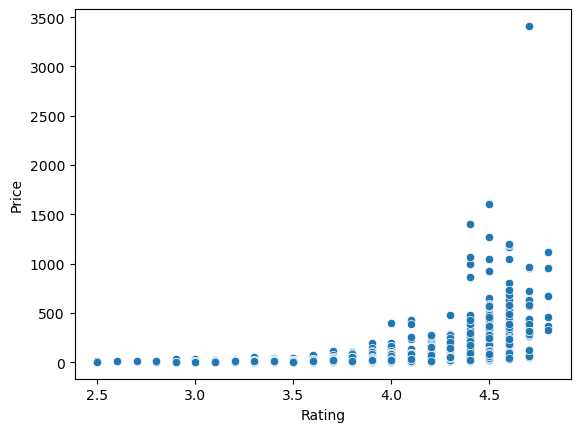

In [38]:
# creating a scatter plot to inspect the relationship between price and rating
sns.scatterplot(data=wine_df, x='Rating', y='Price')

In [39]:
# creating a pivot table between the price and rating variables
wine_crosstab = pd.pivot_table(wine_df, values='Name', \
                   index=['Rating'], columns=['Price_range'], \
                   aggfunc='count', fill_value=0)
wine_crosstab
# looks like wines with a lower rating are cheaper.

Price_range,$4-11,$11-18,$18-38,$38-3411
Rating,,,,
2.5,2,0,0,0
2.6,0,1,0,0
2.7,1,0,0,0
2.8,4,1,0,0
2.9,5,0,1,0
3.0,25,1,1,0
3.1,27,1,1,0
3.2,69,14,4,0
3.3,142,35,6,1


In [40]:
# examining under each rating with bin of 0.1, the average price of the wines produced by each country.
wine_table = pd.pivot_table(wine_df, values='Price', \
                index=['Rating'], columns=['Country'], \
                aggfunc='mean', fill_value=0)
print(wine_table)

Country   Argentina   Australia    Austria     Brazil  Bulgaria  Canada  \
Rating                                                                    
2.5        0.000000    0.000000   0.000000   0.000000      0.00    0.00   
2.6        0.000000    0.000000   0.000000   0.000000      0.00    0.00   
2.7        0.000000    0.000000   0.000000   0.000000      0.00    0.00   
2.8        0.000000    0.000000  11.450000   0.000000      0.00    0.00   
2.9        5.950000    0.000000   0.000000   6.770000      0.00    0.00   
3.0        0.000000    0.000000   0.000000   8.394000      0.00    0.00   
3.1        8.990000    0.000000   0.000000   0.000000      0.00    0.00   
3.2        5.706667    8.098000  20.385000  12.720000      0.00    0.00   
3.3        7.113333    8.610000  10.643333  12.440000      0.00   14.95   
3.4        8.515263    9.192000  11.213333  20.905000      0.00    0.00   
3.5       10.345714    9.343684  11.176667  12.452000      0.00    0.00   
3.6       10.618400   14.

<AxesSubplot:title={'center':'Line plot showing the price of the wine among years'}, xlabel='Year', ylabel='Price'>

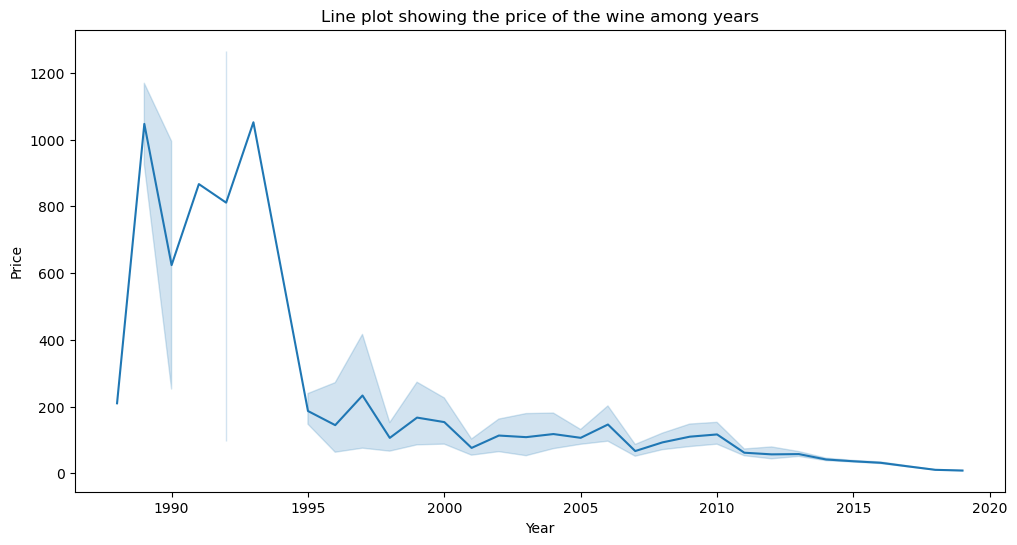

In [41]:
# create a line plot to show the price of the wine among each year
plt.figure(figsize=(12,6))
plt.title('Line plot showing the price of the wine among years')
sns.lineplot(data=wine_df, x="Year", y="Price", legend=True)

<AxesSubplot:title={'center':'Line plot showing the rating of the wine among years'}, xlabel='Year', ylabel='Rating'>

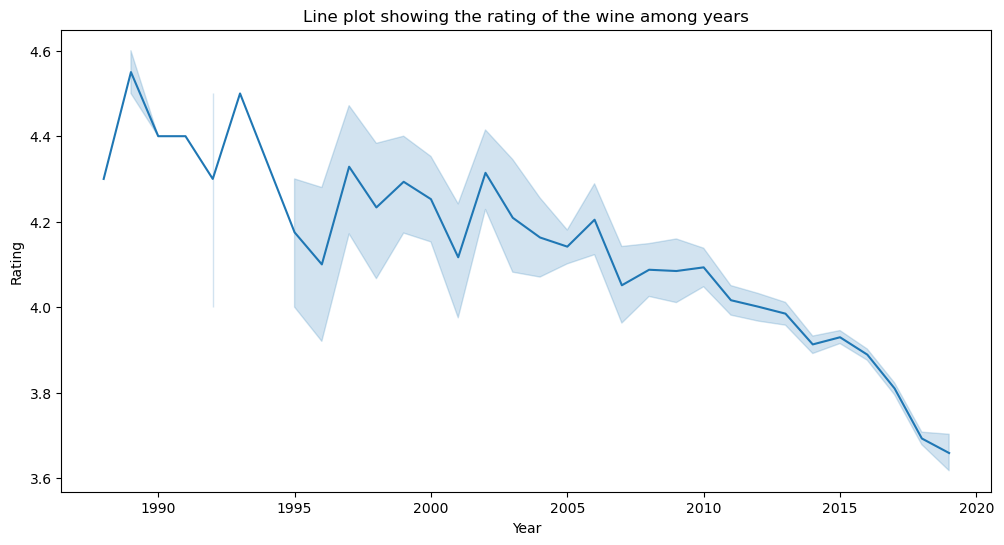

In [42]:
# create a line plot to show the rating of the wine among each year
plt.figure(figsize=(12,6))
plt.title('Line plot showing the rating of the wine among years')
sns.lineplot(data=wine_df, x="Year", y="Rating")
# Both diagrams show a decreasing trend.

# Part 6 Statistical Inference

## Part 6.1 Sampling

In [43]:
# taking out 10% of the data as the sample and stored in the new dataframe
sample_df = wine_df.sample(frac=0.1, replace=False, random_state=1)
sample_df

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,Price_range
3005,Alentejano Reserva Tinto 2015,Portugal,Alentejano,Herdade dos Grous,4.3,255,44.73,2015,$38-3411
6740,Rubio 2016,Italy,Toscana,Poggio San Polo,3.7,606,8.72,2016,$4-11
3011,Clos du Marquis Saint-Julien 2011,France,Saint-Julien,Château Léoville Las Cases,3.9,255,58.44,2011,$38-3411
2896,Pescorosso Aglianico 2014,Italy,Puglia,Coppadoro,3.9,25,9.65,2014,$4-11
8205,Barolo Bussia Colonnello 2013,Italy,Barolo,Aldo Conterno,4.4,88,130.95,2013,$38-3411
...,...,...,...,...,...,...,...,...,...
2796,Malbec 2018,France,Vin de France,HornHead,3.8,241,8.19,2018,$4-11
6057,Bandol Rouge 2016,France,Bandol,Domaine de la Tour du Bon,3.9,51,20.67,2016,$18-38
1720,Bicento 2016,Italy,Irpinia Campi Taurasini,Nativ,4.3,168,27.29,2016,$18-38
4342,Crianza 2016,Spain,Somontano,Bodega Sommos,3.8,340,7.95,2016,$4-11


In [44]:
# extract the qualitative columns
sample_df[['Rating','Price','Year']]

,Rating,Price,Year
3005,4.3,44.73,2015
6740,3.7,8.72,2016
3011,3.9,58.44,2011
2896,3.9,9.65,2014
8205,4.4,130.95,2013
...,...,...,...
2796,3.8,8.19,2018
6057,3.9,20.67,2016
1720,4.3,27.29,2016
4342,3.8,7.95,2016


In [45]:
# calculate the sample mean, population mean and the difference between them for price.
sample_mean = sample_df['Price'].mean()
print(sample_mean)
population_mean = wine_df['Price'].mean()
print(population_mean)
float_num = (population_mean-sample_mean)/population_mean
percentage_num = '{:.2f}%'.format(float_num * 100)
print(percentage_num)

39.914157043879904
39.149788634788635
-1.95%


In [46]:
# calculate the sample standard deviation (std), population std and the difference between them for price.
sample_std = sample_df['Price'].std()
print(sample_std)
population_std = wine_df['Price'].std()
print(population_std)
float_num2 = (population_std-sample_std)/population_std
percentage_num2 = '{:.2f}%'.format(float_num2 * 100)
print(percentage_num2)

86.90964876447119
84.96350306447792
-2.29%


In [47]:
# to calculate the number of rows of which the price is lower than $50
print(sample_df.loc[(sample_df['Price'] < 50)].shape[0])
print(sample_df.loc[(sample_df['Price'] < 50)].shape[1])
# to calculate the proportion of wines cheaper than $50 to the whole sample data of 866 samples.
sample_p = sample_df.loc[(sample_df['Price'] < 50)].shape[0] / sample_df.shape[0]
print(sample_p)
# to calculate the proportion of wines cheaper than $50 to the whole population.
population_p = wine_df.loc[(wine_df['Price'] < 50)].shape[0] / wine_df.shape[0]
print(population_p)
# to calculate the difference between the sample proportion and population proportion
float_num3 = (population_p-sample_p)/population_p
percentage_num3 = '{:.2f}%'.format(float_num3 * 100)
print(percentage_num3)

696
9
0.8036951501154734
0.8235158235158235
2.41%


In [48]:
# Now, draw 10% of the data from wine_df to get the mean of the price data.
mean_list = [wine_df.sample(frac=0.1, replace=False, \
                                 random_state=seed)['Price'].mean() \
                                 for seed in range(866)]

In [49]:
# Create a new dataframe to store the list
mean_df = pd.DataFrame({'Sample Mean':mean_list})
# Compare the mean of the mean list and the population mean.
# Result is really close, which is good.
print(population_mean)
print(mean_df['Sample Mean'].mean())
print(mean_df['Sample Mean'])

39.149788634788635
39.19392800377622
0      37.440427
1      39.914157
2      39.668037
3      37.443014
4      36.186120
         ...    
861    37.908360
862    38.198522
863    39.699400
864    45.990878
865    36.487102
Name: Sample Mean, Length: 866, dtype: float64


<AxesSubplot:xlabel='Sample Mean', ylabel='Count'>

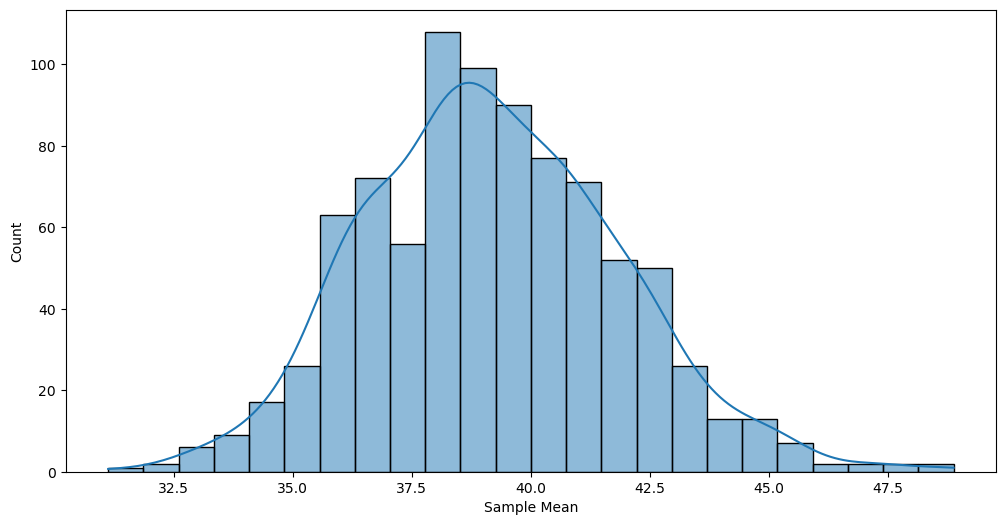

In [50]:
plt.figure(figsize=(12,6))
sns.histplot(data=mean_df, x='Sample Mean', kde=True)

In [51]:
# Repeating the same for rating
population_mean2 = wine_df['Rating'].mean()
print(population_mean2)
mean_list2 = [wine_df.sample(frac=0.1, replace=False, \
                                 random_state=seed)['Rating'].mean() \
                                 for seed in range(866)]

3.8901478401478404


In [52]:
mean_df2 = pd.DataFrame({'Sample Mean2':mean_list2})
print(population_mean2)
print(mean_df2['Sample Mean2'].mean())
print(mean_df2['Sample Mean2'])
# The means are close, which is good

3.8901478401478404
3.8901388881481043
0      3.889954
1      3.885335
2      3.901501
3      3.865935
4      3.877136
         ...   
861    3.884758
862    3.894457
863    3.883141
864    3.913048
865    3.878522
Name: Sample Mean2, Length: 866, dtype: float64


<AxesSubplot:xlabel='Sample Mean2', ylabel='Count'>

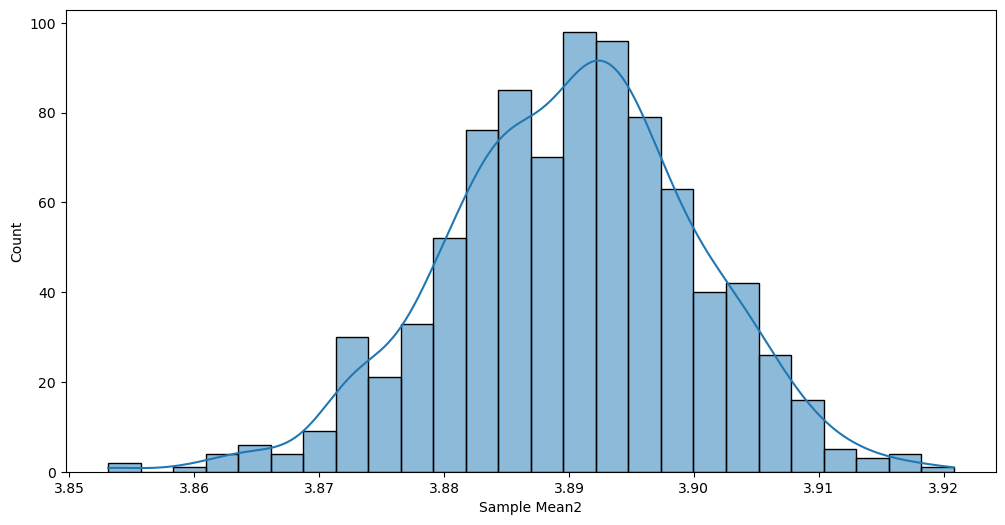

In [53]:
plt.figure(figsize=(12,6))
sns.histplot(data=mean_df2, x='Sample Mean2', kde=True)

## Part 6.2 Central Limited Theorem

<AxesSubplot:xlabel='Price', ylabel='Count'>

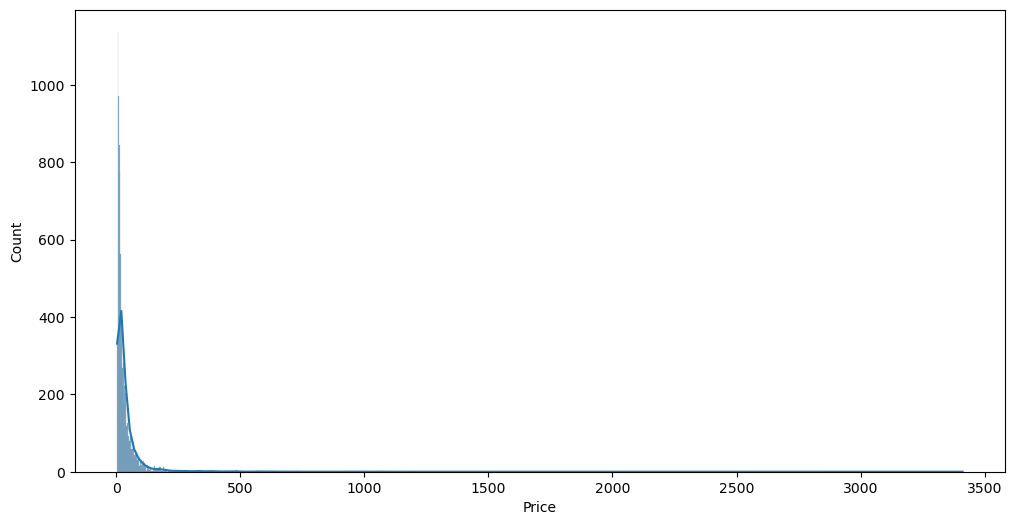

In [54]:
# even though the population for the price of the wines does not follow normal distribution, the distribution of sample mean will likely follow the normal distribution as sample size increases 
plt.figure(figsize=(12,6))
sns.histplot(data=wine_df, x='Price', kde=True)

<AxesSubplot:xlabel='Rating', ylabel='Count'>

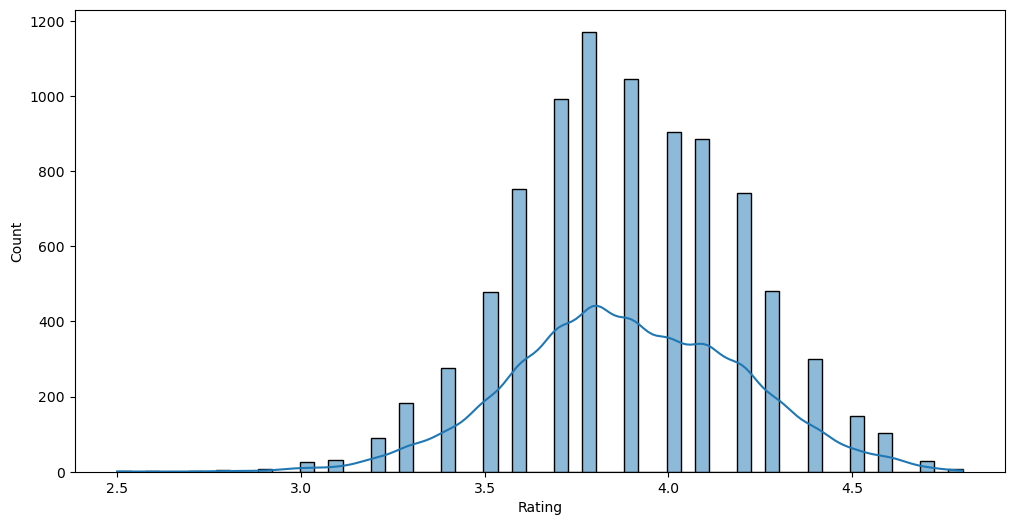

In [55]:
plt.figure(figsize=(12,6))
sns.histplot(data=wine_df, x='Rating', kde=True)
# Rating follows the normal distribution more than the price.

In [56]:
mean_lists = [[wine_df.sample(n=sample_size, replace=False, \
        random_state=seed)['Price'].mean() \
        for seed in range(866)] for sample_size in [2, 100, 1000]]

mean_df = pd.DataFrame({'Sample Mean (n=2)':mean_lists[0], \
                        'Sample Mean (n=100)':mean_lists[1], \
                        'Sample Mean (n=1000)':mean_lists[2]})
mean_df

,Sample Mean (n=2),Sample Mean (n=100),Sample Mean (n=1000)
0,57.975,45.5234,37.84468
1,26.725,56.6027,40.06212
2,36.260,41.7186,38.30477
3,57.120,34.4379,36.91794
4,22.740,27.2802,37.57860
...,...,...,...
861,13.465,34.0256,37.56495
862,22.605,35.5370,39.22015
863,9.490,38.9806,39.87552
864,10.625,59.3084,44.84881


<AxesSubplot:xlabel='Sample Mean (n=1000)', ylabel='Count'>

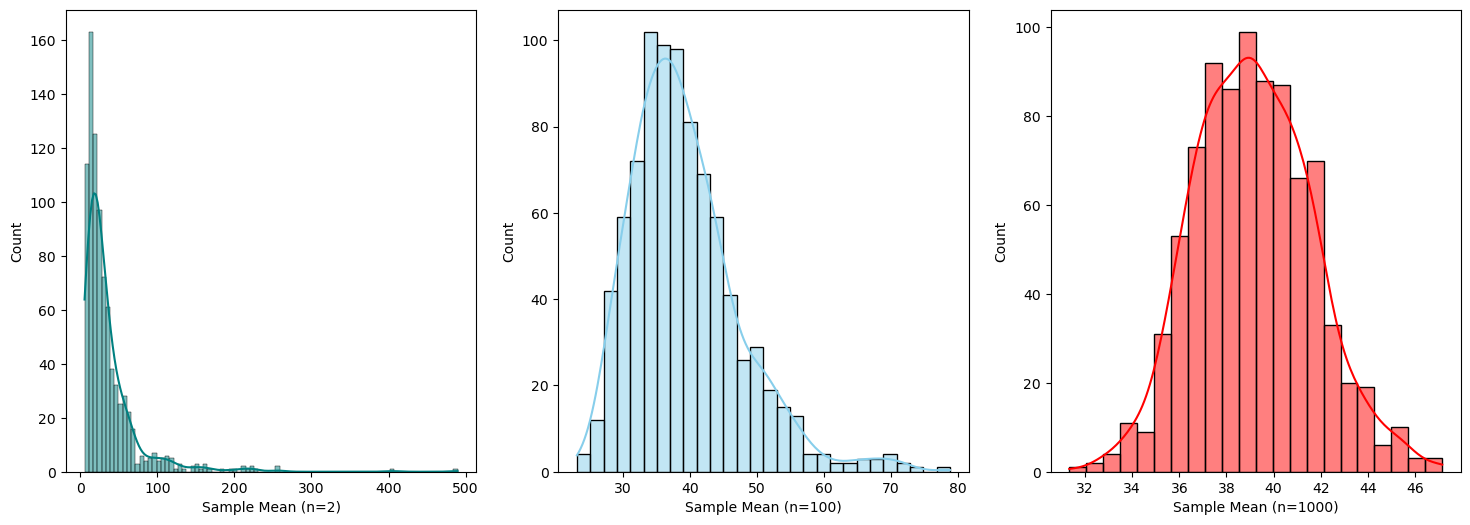

In [57]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
sns.histplot(data=mean_df, x="Sample Mean (n=2)", color='teal', kde=True, ax=axs[0])
sns.histplot(data=mean_df, x="Sample Mean (n=100)", color='skyblue', kde=True, ax=axs[1])
sns.histplot(data=mean_df, x="Sample Mean (n=1000)", color='red', kde=True, ax=axs[2])

In [58]:
mean_lists = [[wine_df.sample(n=sample_size, replace=False, \
        random_state=seed)['Rating'].mean() \
        for seed in range(866)] for sample_size in [2, 100, 1000]]

mean_df = pd.DataFrame({'Sample Mean (n=2)':mean_lists[0], \
                        'Sample Mean (n=100)':mean_lists[1], \
                        'Sample Mean (n=1000)':mean_lists[2]})
mean_df

,Sample Mean (n=2),Sample Mean (n=100),Sample Mean (n=1000)
0,4.30,3.946,3.8848
1,4.00,3.932,3.8808
2,3.75,3.914,3.8962
3,4.10,3.884,3.8703
4,3.80,3.860,3.8818
...,...,...,...
861,3.70,3.904,3.8878
862,3.80,3.913,3.8940
863,3.75,3.861,3.8845
864,3.60,3.897,3.9110


<AxesSubplot:xlabel='Sample Mean (n=1000)', ylabel='Count'>

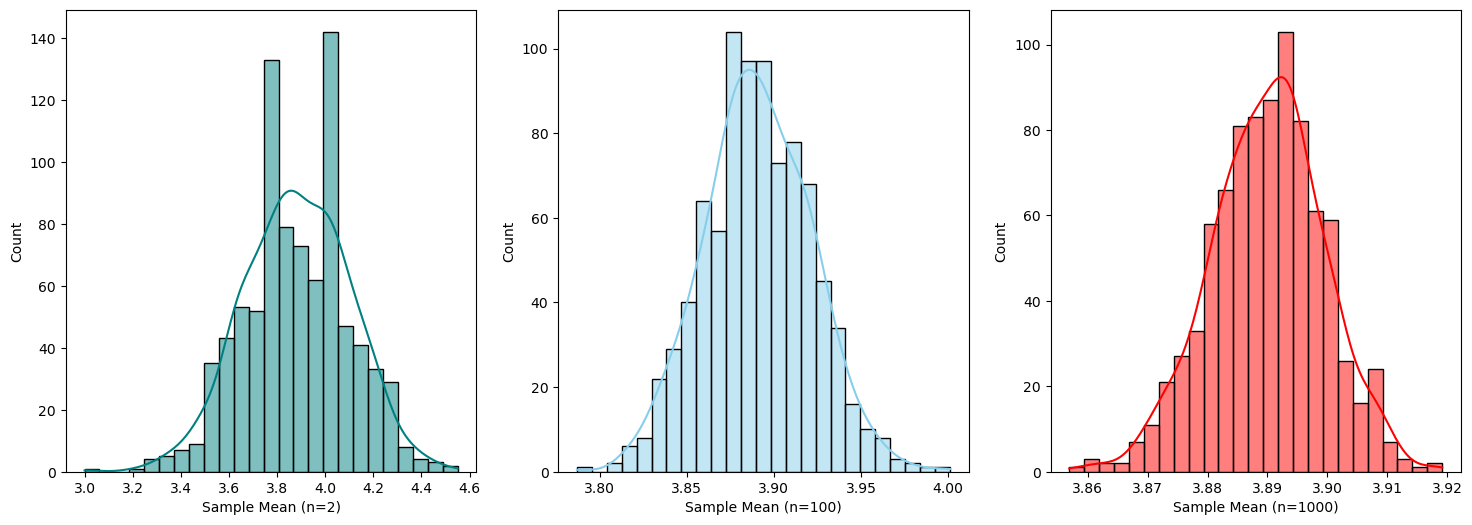

In [59]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
sns.histplot(data=mean_df, x="Sample Mean (n=2)", color='teal', kde=True, ax=axs[0])
sns.histplot(data=mean_df, x="Sample Mean (n=100)", color='skyblue', kde=True, ax=axs[1])
sns.histplot(data=mean_df, x="Sample Mean (n=1000)", color='red', kde=True, ax=axs[2])

## Part 6.3 Interval Estimate

In [60]:
# Estimate the margin of error for sample mean of price
from scipy.stats import t
import math

sample_df = wine_df.sample(frac=0.1, replace=False, random_state=1)
# confidence interval of 95%
alpha = 1 - 0.95
sample_mean_P = sample_df['Price'].mean()
sample_std_P = sample_df['Price'].std()
n = sample_df.shape[0]
dof = n - 1
t_one_tail = abs(t.ppf(alpha/2, dof))  
error_margin = t_one_tail * (sample_std_P / math.sqrt(n))
upper_boundary = sample_mean_P + error_margin
lower_boundary = sample_mean_P - error_margin

print("Sample Mean =", sample_mean_P)
print("With alpha =", alpha)
print("Interval Estimate of a Population Mean is from", lower_boundary, \
                                                  "to", upper_boundary)

Sample Mean = 39.914157043879904
With alpha = 0.050000000000000044
Interval Estimate of a Population Mean is from 34.117665002614544 to 45.71064908514526


In [61]:
# Estimate the margin of error for sample mean of rating
sample_df = wine_df.sample(frac=0.1, replace=False, random_state=1)
# confidence interval of 95%
alpha = 1 - 0.95
sample_mean_R = sample_df['Rating'].mean()
sample_std_R = sample_df['Rating'].std()
n = sample_df.shape[0]
dof = n - 1
t_one_tail = abs(t.ppf(alpha/2, dof))  
error_margin = t_one_tail * (sample_std_R / math.sqrt(n))
upper_boundary = sample_mean_R + error_margin
lower_boundary = sample_mean_R - error_margin

print("Sample Mean =", sample_mean_R)
print("With alpha =", alpha)
print("Interval Estimate of a Population Mean is from", lower_boundary, \
                                                  "to", upper_boundary)

Sample Mean = 3.8853348729792145
With alpha = 0.050000000000000044
Interval Estimate of a Population Mean is from 3.8637803577902217 to 3.9068893881682074


## Part 6.4 Hypothesis Testing

In [62]:
t_score_P = (sample_mean_P - 30) / (sample_std_P / math.sqrt(n))
# To test whether the average price of the wine is greater than $30 statistically. 
p_value_P = t.sf(abs(t_score_P), n-1)
p_value_P
# P-value for price is smaller than 0.05
# Rejected null hypothesis
# The average price of the wine is greater than $30

0.00041120310073358994

In [63]:
t_score_R = (sample_mean_R - 3.5) / (sample_std_R / math.sqrt(n))
# To test whether the average rating of the wine is greater than 3.5 statistically. 
p_value_R = t.sf(abs(t_score_R), n-1)
p_value_R
# P-value for rating is smaller than 0.05
# Rejected null hypothesis
# The average rating of the wine is greater than 3.5

9.803662144695258e-169

# Part 7 Regression Analysis

## Part 7.1 Single Regression Model

In [64]:
# Setting price as the dependent variable
# As the price value is quite big, natural logarithm will be taken in the next code.
dependent_df = wine_df[['Price']]
dependent_df.sort_values(by=['Price'], ascending=False)

,Price
2340,3410.79
7458,1599.95
5553,1399.00
4390,1266.25
4119,1197.90
...,...
6861,3.99
108,3.95
6400,3.79
2933,3.70


In [65]:
pd.options.mode.chained_assignment = None
dependent_df['Price_log'] = np.log(dependent_df['Price']+1)
dependent_df

,Price,Price_log
0,95.00,4.564348
1,15.50,2.803360
2,7.45,2.134166
3,8.72,2.274186
4,29.15,3.406185
...,...,...
8653,16.47,2.860485
8654,20.09,3.048799
8655,23.95,3.216874
8656,6.21,1.975469


In [66]:
# Setting rating as the independent variable
independent_df = wine_df[['Rating']]
independent_df

,Rating
0,4.2
1,4.3
2,3.9
3,3.5
4,3.9
...,...
8653,3.8
8654,4.0
8655,3.7
8656,3.5


In [67]:
import statsmodels.api as sm
sm.add_constant(independent_df, prepend=True)
independent_df = sm.add_constant(independent_df, prepend=True)
independent_df
# constant is added to hold the value of 1.0
# As the rating value is not that large, no natural logarithm is taken.

,const,Rating
0,1.0,4.2
1,1.0,4.3
2,1.0,3.9
3,1.0,3.5
4,1.0,3.9
...,...,...
8653,1.0,3.8
8654,1.0,4.0
8655,1.0,3.7
8656,1.0,3.5


In [68]:
# Running a regression analysis on the dependent variable "rating" and independent variable "price_log"
mod_log = sm.OLS(dependent_df['Price_log'], independent_df)
res_log = mod_log.fit()
display(res_log.summary())
# Findings will be illustrated in the report.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Price_log   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                 1.145e+04
Date:                Thu, 30 Mar 2023   Prob (F-statistic):               0.00
Time:                        08:47:34   Log-Likelihood:                -7665.2
No. Observations:                8658   AIC:                         1.533e+04
Df Residuals:                    8656   BIC:                         1.535e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.3675      0.080    -67.294      0.000      -5.524      -5.211
Rating         2.1874      0.020    107.019      0.000       2.147       2.227
==============================================================================
Omnibus:                      405.665   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              564.028
Skew:                           0.450   Prob(JB):                    3.33e-123
Kurtosis:                       3.867   Cond. No.                         52.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
# Without log, the coefficient become a lot larger
mod_log = sm.OLS(dependent_df['Price'], independent_df)
res_log = mod_log.fit()
display(res_log.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     2213.
Date:                Thu, 30 Mar 2023   Prob (F-statistic):               0.00
Time:                        08:47:34   Log-Likelihood:                -49760.
No. Observations:                8658   AIC:                         9.952e+04
Df Residuals:                    8656   BIC:                         9.954e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -444.4222     10.311    -43.102      0.000    -464.634    -424.210
Rating       124.3068      2.642     47.046      0.000     119.127     129.486
==============================================================================
Omnibus:                    17059.062   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         81673340.563
Skew:                          15.471   Prob(JB):                         0.00
Kurtosis:                     477.807   Cond. No.                         52.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

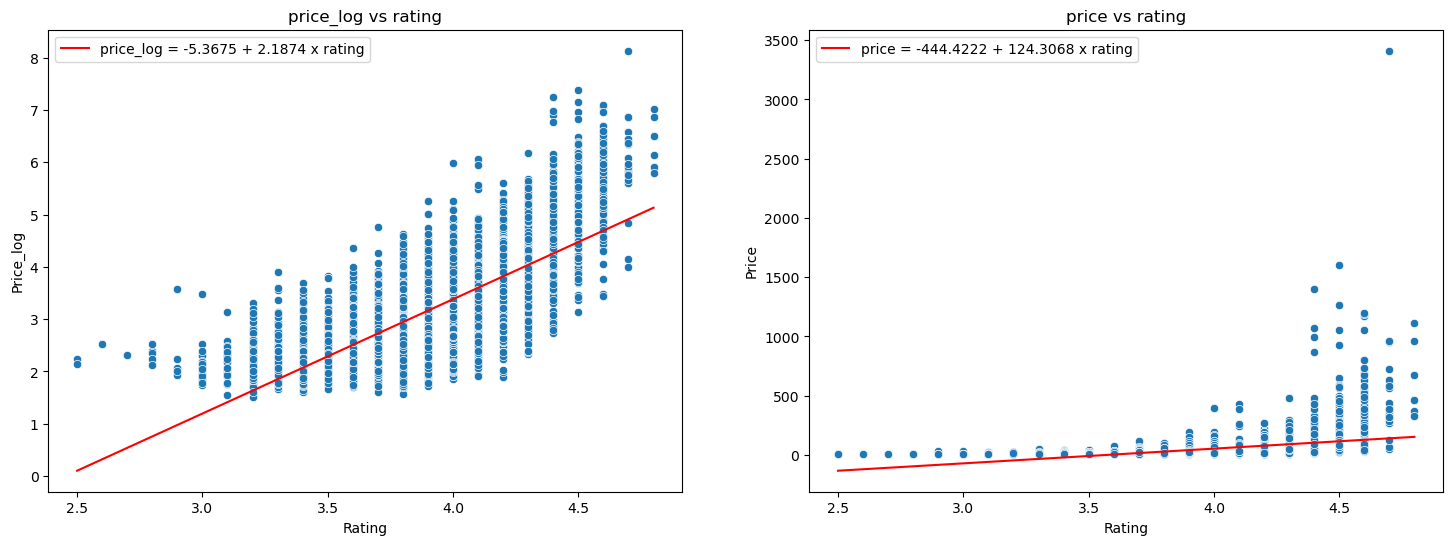

In [70]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Show the scatter plot and the regression line of "price_log vs rating"
axs[0].set_title('price_log vs rating')
sns.scatterplot(x=independent_df['Rating'], y=dependent_df['Price_log'], ax=axs[0])

x_data = np.linspace(independent_df['Rating'].min(), independent_df['Rating'].max(), 2)
y1_data = -5.3675 + 2.1874 * x_data
sns.lineplot(x=x_data, y=y1_data, color='red', label='price_log = -5.3675 + 2.1874 x rating', ax=axs[0])


# Show the scatter plot and the regression line of "price vs rating"
axs[1].set_title('price vs rating')
sns.scatterplot(x=independent_df['Rating'], y=dependent_df['Price'], ax=axs[1])

y2_data = -444.4222 + 124.3068 * x_data
sns.lineplot(x=x_data, y=y2_data, color='red', label='price = -444.4222 + 124.3068 x rating', ax=axs[1])

fig.show()

<AxesSubplot:xlabel='Rating', ylabel='Price'>

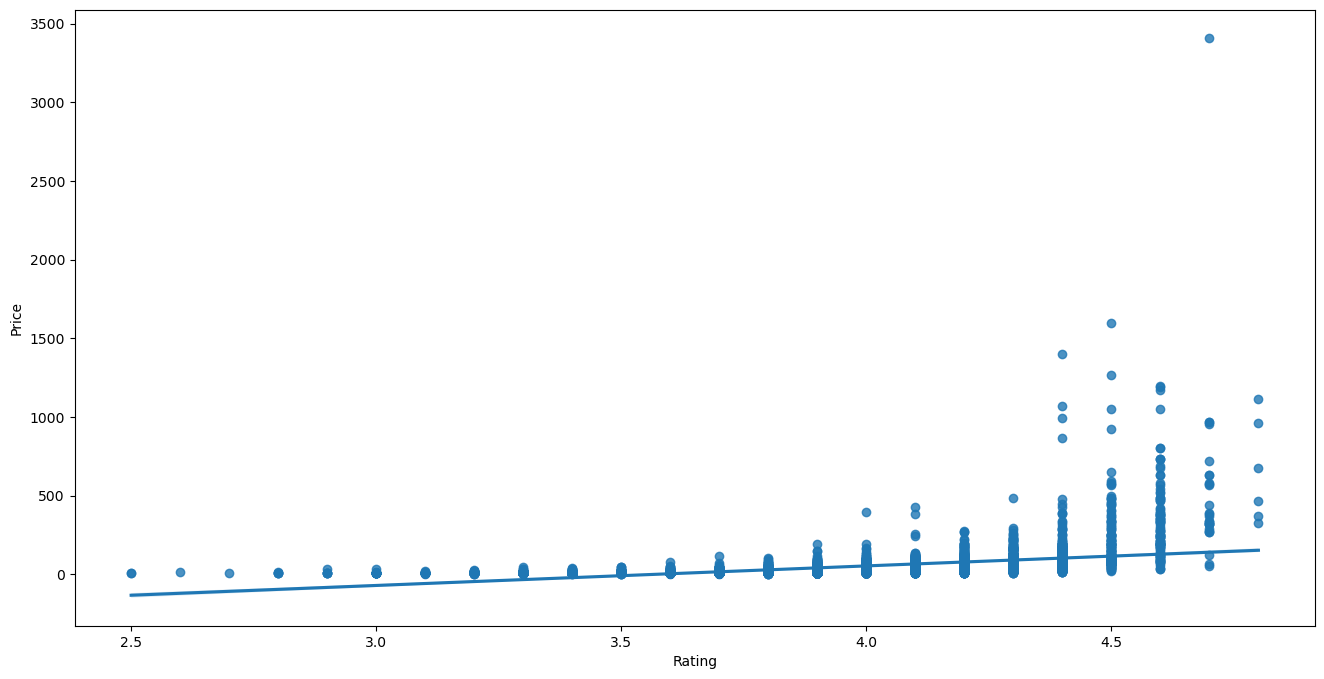

In [71]:
# To use .regplot to get the regression line (another way)
plt.figure(figsize=(16,8))
sns.regplot(data=wine_df, x='Rating', y='Price')

In [72]:
# Another way to get R and R-sqaure
import scipy.stats
print(stats.pearsonr(dependent_df['Price'], independent_df['Rating']))

# Get the correlation coefficient only
print("R = ", stats.pearsonr(dependent_df['Price'], independent_df['Rating'])[0])

# taking square
print("R-squared =", stats.pearsonr(dependent_df['Price'], independent_df['Rating'])[0] ** 2)

print()

# Another way to get beta 0 and beta 1
print(np.polyfit(independent_df['Rating'], dependent_df['Price'],1))
print("beta 0 = ", np.polyfit(independent_df['Rating'], dependent_df['Price'],1)[1])
print("beta 1 = ", np.polyfit(independent_df['Rating'], dependent_df['Price'],1)[0])

(0.45125138569757595, 0.0)
R =  0.45125138569757595
R-squared = 0.20362781309398245

[ 124.306849   -444.42223151]
beta 0 =  -444.422231509653
beta 1 =  124.30684899781713


## Part 7.2 Multi Regression Analysis

In [73]:
# Does the number of ratings also related to the price (more comments and higher trustability?)
independent_df[['Rating', 'NumberOfRatings']] = wine_df[['Rating', 'NumberOfRatings']]
independent_df

,const,Rating,NumberOfRatings
0,1.0,4.2,100
1,1.0,4.3,100
2,1.0,3.9,100
3,1.0,3.5,100
4,1.0,3.9,100
...,...,...,...
8653,1.0,3.8,994
8654,1.0,4.0,995
8655,1.0,3.7,996
8656,1.0,3.5,998


In [74]:
mod = sm.OLS(dependent_df['Price_log'], independent_df)
res_multi = mod.fit()
display(res_multi.summary())
# there is really insignificant negative relationship seems.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Price_log   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     5819.
Date:                Thu, 30 Mar 2023   Prob (F-statistic):               0.00
Time:                        08:47:37   Log-Likelihood:                -7625.4
No. Observations:                8658   AIC:                         1.526e+04
Df Residuals:                    8655   BIC:                         1.528e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -5.3905      0.079    -67.854      0.000      -5.546      -5.235
Rating              2.2002      0.020    107.867      0.000       2.160       2.240
NumberOfRatings -6.556e-05   7.34e-06     -8.937      0.000   -7.99e-05   -5.12e-05
==============================================================================
Omnibus:                      402.776   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              568.235
Skew:                           0.443   Prob(JB):                    4.07e-124
Kurtosis:                       3.888   Cond. No.                     1.24e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [75]:
# Conducting dummies for the year of production
year_dummies = pd.get_dummies(wine_df['Year'])
year_dummies

,1988,1989,1990,1991,1992,1993,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8653,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8654,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8655,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8656,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [76]:
year_dummies.columns

Int64Index([1988, 1989, 1990, 1991, 1992, 1993, 1995, 1996, 1997, 1998, 1999,
            2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
            2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
           dtype='int64')

In [77]:
# add dummies column to the independent_df
independent_df[year_dummies.columns] = year_dummies
independent_df

,const,Rating,NumberOfRatings,1988,1989,1990,1991,1992,1993,1995,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,1.0,4.2,100,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1.0,4.3,100,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1.0,3.9,100,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1.0,3.5,100,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1.0,3.9,100,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8653,1.0,3.8,994,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8654,1.0,4.0,995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8655,1.0,3.7,996,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8656,1.0,3.5,998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [78]:
log_mod = sm.OLS(dependent_df['Price_log'], independent_df)
reg_price_log = log_mod.fit()
display(reg_price_log.summary())
# Consistent with findings in prior parts, the price of the wine dropped across the years until the more recent years.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Price_log   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     557.4
Date:                Thu, 30 Mar 2023   Prob (F-statistic):               0.00
Time:                        08:47:37   Log-Likelihood:                -6461.1
No. Observations:                8658   AIC:                         1.299e+04
Df Residuals:                    8625   BIC:                         1.322e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -3.0365      0.086    -35.270      0.000      -3.205      -2.868
Rating              1.8353      0.019     95.041      0.000       1.797       1.873
NumberOfRatings  -6.71e-05   6.43e-06    -10.435      0.000   -7.97e-05   -5.45e-05
1988                0.5082      0.497      1.023      0.306      -0.465       1.482
1989                1.7057      0.352      4.842      0.000       1.015       2.396
1990                1.2050      0.352      3.421      0.001       0.515       1.895
1991                1.7673      0.497      3.559      0.000       0.794       2.741
1992                1.4017      0.288      4.860      0.000       0.836       1.967
1993                1.8520      0.497      3.729      0.000       0.878       2.826
1995                0.5860      0.250      2.339      0.019       0.095       1.077
1996                0.2038      0.225      0.907      0.364      -0.237       0.644
1997               -0.0088      0.191     -0.046      0.963      -0.383       0.366
1998               -0.1710      0.206     -0.831      0.406      -0.574       0.232
1999               -0.1045      0.133     -0.783      0.434      -0.366       0.157
2000               -0.1400      0.120     -1.168      0.243      -0.375       0.095
2001               -0.2955      0.148     -1.998      0.046      -0.585      -0.006
2002               -0.2973      0.191     -1.556      0.120      -0.672       0.077
2003               -0.3175      0.154     -2.061      0.039      -0.620      -0.015
2004               -0.2402      0.103     -2.340      0.019      -0.441      -0.039
2005               -0.2565      0.055     -4.648      0.000      -0.365      -0.148
2006               -0.2507      0.084     -2.989      0.003      -0.415      -0.086
2007               -0.4914      0.085     -5.812      0.000      -0.657      -0.326
2008               -0.3766      0.067     -5.605      0.000      -0.508      -0.245
2009               -0.3755      0.066     -5.682      0.000      -0.505      -0.246
2010               -0.3499      0.053     -6.544      0.000      -0.455      -0.245
2011               -0.5594      0.048    -11.590      0.000      -0.654      -0.465
2012               -0.7073      0.046    -15.405      0.000      -0.797      -0.617
2013               -0.6536      0.043    -15.063      0.000      -0.739      -0.569
2014               -0.7583      0.042    -18.085      0.000      -0.840      -0.676
2015               -0.8886      0.040    -22.041      0.000      -0.968      -0.810
2016               -0.9962      0.040    -24.977      0.000      -1.074      -0.918
2017               -1.1527      0.040    -28.645      0.000      -1.232      -1.074
2018               -1.3804      0.041    -33.409      0.000      -1.461      -1.299
2019               -1.4943      0.060    -24.886      0.000

In [79]:
# Also showing the "price" result instead. The coefficients are much larger without natural log.
mod = sm.OLS(dependent_df['Price'], independent_df)
reg_price = mod.fit()
display(reg_price.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     129.6
Date:                Thu, 30 Mar 2023   Prob (F-statistic):               0.00
Time:                        08:47:38   Log-Likelihood:                -49046.
No. Observations:                8658   AIC:                         9.816e+04
Df Residuals:                    8625   BIC:                         9.839e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -203.6484     11.778    -17.291      0.000    -226.736    -180.561
Rating            105.5687      2.642     39.961      0.000     100.390     110.747
NumberOfRatings    -0.0029      0.001     -3.273      0.001      -0.005      -0.001
1988              -40.1127     67.934     -0.590      0.555    -173.279      93.054
1989              773.3307     48.197     16.045      0.000     678.853     867.809
1990              363.9261     48.185      7.553      0.000     269.472     458.380
1991              607.4721     67.937      8.942      0.000     474.300     740.644
1992              561.8151     39.456     14.239      0.000     484.472     639.158
1993              785.3326     67.949     11.558      0.000     652.137     918.529
1995              -50.1669     34.266     -1.464      0.143    -117.337      17.003
1996              -84.8461     30.736     -2.760      0.006    -145.097     -24.595
1997              -19.4520     26.138     -0.744      0.457     -70.688      31.784
1998             -135.4045     28.143     -4.811      0.000    -190.571     -80.238
1999              -81.4899     18.262     -4.462      0.000    -117.287     -45.693
2000              -90.8302     16.400     -5.538      0.000    -122.978     -58.683
2001             -153.5788     20.235     -7.590      0.000    -193.244    -113.914
2002             -137.3681     26.136     -5.256      0.000    -188.600     -86.136
2003             -130.8651     21.081     -6.208      0.000    -172.189     -89.542
2004             -117.6103     14.043     -8.375      0.000    -145.137     -90.083
2005             -126.1690      7.550    -16.710      0.000    -140.970    -111.368
2006              -92.7140     11.473     -8.081      0.000    -115.203     -70.225
2007             -156.3454     11.567    -13.517      0.000    -179.019    -133.672
2008             -133.7129      9.192    -14.547      0.000    -151.730    -115.695
2009             -116.4930      9.041    -12.885      0.000    -134.216     -98.770
2010             -110.6718      7.315    -15.130      0.000    -125.011     -96.333
2011             -157.6126      6.603    -23.871      0.000    -170.555    -144.670
2012             -160.8148      6.281    -25.602      0.000    -173.128    -148.502
2013             -158.6442      5.936    -26.725      0.000    -170.281    -147.008
2014             -166.9309      5.736    -29.103      0.000    -178.175    -155.687
2015             -174.0885      5.515    -31.564      0.000    -184.900    -163.277
2016             -174.3767      5.456    -31.959      0.000    -185.072    -163.681
2017             -176.8130      5.505    -32.119      0.000    -187.604    -166.022
2018             -174.8859      5.652    -30.940      0.000    -185.966    -163.806
2019             -173.5276      8.214    -21.125      0.000

# Part 8 Forecasting

In [80]:
# create a function to calculate the forecast error for different methods
def forecast_accuracy(df, obs, pred):
    mfe = (df[obs] - df[pred]).mean()
    mae = abs(df[obs] - df[pred]).mean()
    mse = ((df[obs] - df[pred]) ** 2).mean()
    mape = (((df[obs] - df[pred]) / df[obs]) * 100).mean()

    return 'Mean Forcasting Error (MFE): '+str(mfe)+\
           '\nMean Absolute Error (MAE): '+str(mae)+\
           '\nMean Squared Error (MSE): '+str(mse)+\
           '\nMean Absolute Percentage Error (MAPE): '+str(mape)

In [81]:
# store the year and price column to the forecast_df.
# sort by the year for clear presentation
# use reset_index function to reset the sorted index starting from 0.
forecast_df = pd.DataFrame()
forecast_df[['Year', 'obs_price']] = wine_df[['Year', 'Price']]
forecast_df = forecast_df.sort_values(by='Year', ascending = True)
forecast_df = forecast_df.reset_index(drop=True)
forecast_df

,Year,obs_price
0,1988,209.60
1,1989,925.08
2,1989,1168.77
3,1990,252.47
4,1990,995.00
...,...,...
8653,2019,6.20
8654,2019,7.75
8655,2019,4.65
8656,2019,4.67


In [82]:
# calculate exponentially weighted averages with a smoothing constant 0.2 and 0.5 for the 'obs_price' column
forecast_df['0.2_exponential_smoothing'] = forecast_df.ewm(alpha=0.2)['obs_price'].mean()
forecast_df['0.5_exponential_smoothing'] = forecast_df.ewm(alpha=0.5)['obs_price'].mean()
forecast_df

,Year,obs_price,0.2_exponential_smoothing,0.5_exponential_smoothing
0,1988,209.60,209.600000,209.600000
1,1989,925.08,607.088889,686.586667
2,1989,1168.77,837.286066,962.120000
3,1990,252.47,639.177642,583.640000
4,1990,995.00,745.026749,795.954839
...,...,...,...,...
8653,2019,6.20,7.063591,6.854630
8654,2019,7.75,7.200873,7.302315
8655,2019,4.65,6.690698,5.976158
8656,2019,4.67,6.286559,5.323079


In [83]:
# Call the function to calculate the forecast error here
print(forecast_accuracy(forecast_df, 'obs_price', '0.2_exponential_smoothing'))

Mean Forcasting Error (MFE): -0.2690852751705187
Mean Absolute Error (MAE): 24.986127404997312
Mean Squared Error (MSE): 4265.2244531177375
Mean Absolute Percentage Error (MAPE): -69.78549747302438


In [84]:
print(forecast_accuracy(forecast_df, 'obs_price', '0.5_exponential_smoothing'))

Mean Forcasting Error (MFE): -0.0548300833380554
Mean Absolute Error (MAE): 16.77797095027181
Mean Squared Error (MSE): 1988.1024217947975
Mean Absolute Percentage Error (MAPE): -42.8898362697067


<AxesSubplot:xlabel='Year', ylabel='obs_price'>

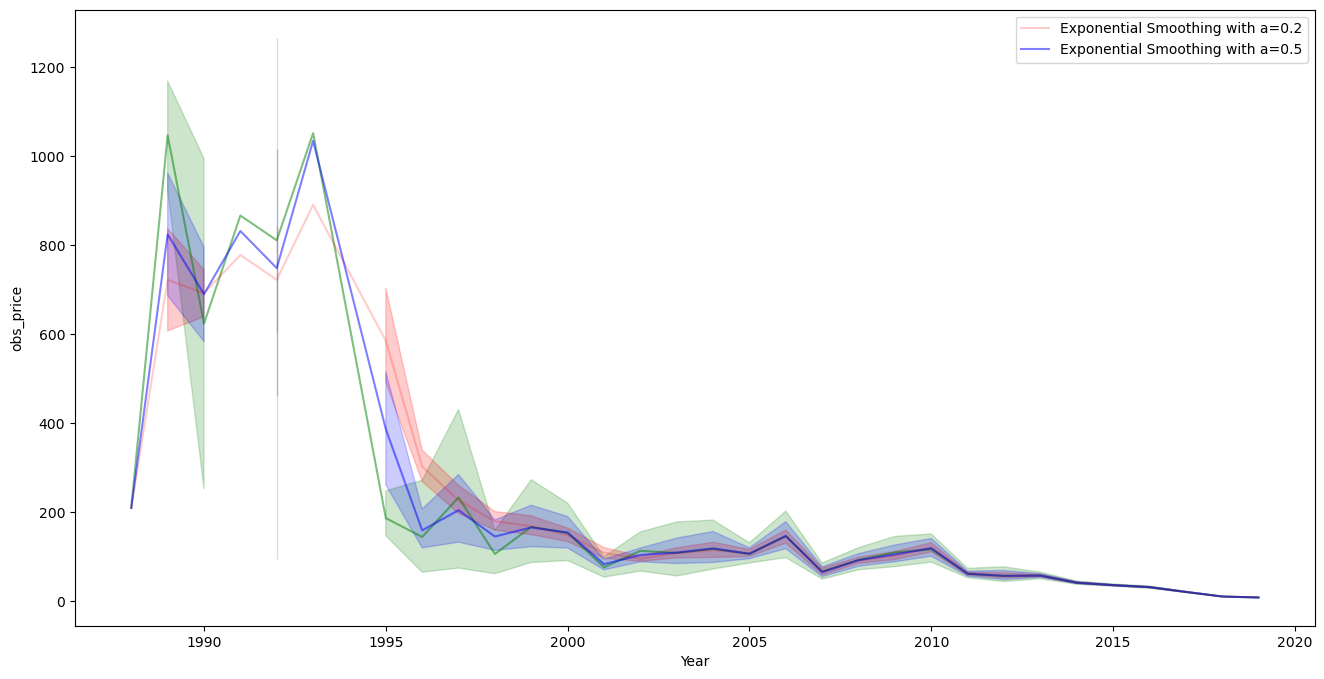

In [85]:
# plot the forecast graph of wine price across years using the exponential smoothing method.
plt.figure(figsize=(16,8))

sns.lineplot(data=forecast_df, x='Year', y='obs_price', color='green', alpha=0.5)
sns.lineplot(data=forecast_df, x='Year', y='0.2_exponential_smoothing', color='red', alpha=0.2, label='Exponential Smoothing with a=0.2')
sns.lineplot(data=forecast_df, x='Year', y='0.5_exponential_smoothing', color='blue', alpha=0.5, label='Exponential Smoothing with a=0.5')